The slowest run took 6.37 times longer than the fastest. This could mean that an intermediate result is being cached.
36 ms ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


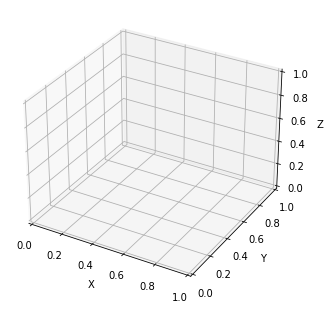

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from stl import mesh

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


r_roll =math.radians(0)
r_yaw =math.radians(0)
r_pitch =math.radians(0)
view_w=math.radians(36)
view_h=math.radians(27)
# 画像１
img1 = cv2.imread("test1.jpg")
# 画像２
img2 = cv2.imread("test2.jpg")

# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()

# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher生成
bf = cv2.BFMatcher(cv2.NORM_HAMMING)


# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
matches = bf.match(des1,des2)




def convert_3d(data):

    d=750/350*2.54/math.atan(view_h)
    d_from_center = math.sqrt((((data[0]-375)/350*2.54)**2)+(((data[1]-250)/350*2.54)**2))
    D=math.sqrt((d**2)+(d_from_center**2))
    if data[0]-375>0 and data[1]-250<0:#1
        r_r=math.atan(((250-data[1])/350*2.54)/((data[0]-375)/350*2.54))
        all_rotate=r_roll+r_r
        r_p=math.asin(d_from_center*math.sin(all_rotate)/D)
        all_pitch=r_pitch+r_p
        r_y=math.asin(d_from_center*math.cos(all_rotate)/D)
        all_yaw=r_yaw-r_y
    elif data[0]-375>0 and data[1]-250>0:#2
        r_r=math.atan(((250-data[1])/350*2.54)/((data[0]-375)/350*2.54))
        all_rotate=r_roll+r_r
        r_p=math.asin(d_from_center*math.sin(all_rotate)/D)
        all_pitch=r_pitch-r_p
        r_y=math.asin(d_from_center*math.cos(all_rotate)/D)
        all_yaw=r_yaw-r_y
    elif data[0]-375<0 and data[1]-250<0:#3
        r_r=math.atan(((250-data[1])/350*2.54)/((data[0]-375)/350*2.54))
        all_rotate=r_roll+r_r
        r_p=math.asin(d_from_center*math.sin(all_rotate)/D)
        all_pitch=r_pitch-r_p
        r_y=math.asin(d_from_center*math.cos(all_rotate)/D)
        all_yaw=r_yaw+r_y
    elif data[0]-375<0 and data[1]-250>0:#4
        r_r=math.atan(((250-data[1])/350*2.54)/((data[0]-375)/350*2.54))
        all_rotate=r_roll+r_r
        r_p=math.asin(d_from_center*math.sin(all_rotate)/D)
        all_pitch=r_pitch+r_p
        r_y=math.asin(d_from_center*math.cos(all_rotate)/D)
        all_yaw=r_yaw+r_y
    
    
    x=D*math.cos(all_pitch)*math.sin(all_yaw)
    y=D*math.cos(all_pitch)*math.cos(all_yaw)
    z=D*math.sin(all_pitch)
    return x,y,z
    

def convert(data):
    data_converted=[]
    for loc in data:
        data_converted.append(convert_3d(loc))
    coe = (data_converted[0][1]+0.6)/data_converted[1][1]
    
    return round(data_converted[1][0]*coe,5),round(data_converted[1][1]*coe,5),round(data_converted[1][2]*coe,5)

def collect(matches):
    polygon=[]
    for one in matches:
        n =[kp1[one.queryIdx].pt,kp2[one.queryIdx].pt]
        summit=convert(n)
        polygon.append(summit)
    poly=np.array(polygon).astype(float)
    return poly
    


%timeit x=collect(matches)